# Session 3 — Sentence-Level Analysis
## Measure 1: Sentence Length & Distribution
This notebook helps you split your text into sentences and compute:
- number of sentences
- average sentence length (in tokens and in characters)
- distribution / histogram of sentence lengths
- comparison across two texts/authors

Like before, we'll analyze Lewis Carroll's two Alice books as our example texts:
- Alice's Adventures in Wonderland
- Through the Looking-Glass

In [1]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load the Alice books from Project Gutenberg
def load_book(filepath):
    """Load and clean book text from Project Gutenberg"""
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
    
    # Remove Project Gutenberg headers/footers
    # Find start of actual content
    if 'CHAPTER I' in text:
        start = text.find('CHAPTER I')
        text = text[start:]
    elif '*** START OF' in text:
        start = text.find('*** START OF')
        text = text[start + 100:]  # Skip the marker line
    
    # Remove end markers
    if '*** END OF' in text:
        end = text.find('*** END OF')
        text = text[:end]
    elif 'End of Project Gutenberg' in text:
        end = text.find('End of Project Gutenberg')
        text = text[:end]
    
    return text.strip()

# Load both Alice books
wonderland_text = load_book('../data/Wonderland.txt')
looking_glass_text = load_book('../data/Looking-Glass.txt')

print(f"Alice's Adventures in Wonderland: {len(wonderland_text):,} characters")
print(f"Through the Looking-Glass: {len(looking_glass_text):,} characters")

Alice's Adventures in Wonderland: 144,481 characters
Through the Looking-Glass: 161,373 characters


In [2]:
# Analyze sentence length for both books
def analyze_sentences(text, book_name):
    """Split text into sentences and analyze lengths"""
    # Split on sentence boundaries
    sentences = re.split(r'[.!?]+\s+', text.strip())
    sentences = [s.strip() for s in sentences if s.strip() and len(s.split()) > 2]
    
    lengths_tokens = [len(s.split()) for s in sentences]
    lengths_chars = [len(s) for s in sentences]
    
    print(f"\n{'='*70}")
    print(f"{book_name}")
    print(f"{'='*70}")
    print(f"Number of sentences: {len(sentences):,}")
    print(f"Avg sentence length (tokens): {sum(lengths_tokens)/len(lengths_tokens):.2f}")
    print(f"Avg sentence length (chars): {sum(lengths_chars)/len(lengths_chars):.2f}")
    print(f"Min sentence length (tokens): {min(lengths_tokens)}")
    print(f"Max sentence length (tokens): {max(lengths_tokens)}")
    
    return sentences, lengths_tokens, lengths_chars

# Analyze both books
wonderland_sents, wonderland_tokens, wonderland_chars = analyze_sentences(wonderland_text, "Alice's Adventures in Wonderland")
looking_glass_sents, looking_glass_tokens, looking_glass_chars = analyze_sentences(looking_glass_text, "Through the Looking-Glass")


Alice's Adventures in Wonderland
Number of sentences: 931
Avg sentence length (tokens): 28.41
Avg sentence length (chars): 152.19
Min sentence length (tokens): 3
Max sentence length (tokens): 260

Through the Looking-Glass
Number of sentences: 1,195
Avg sentence length (tokens): 24.49
Avg sentence length (chars): 132.33
Min sentence length (tokens): 3
Max sentence length (tokens): 156


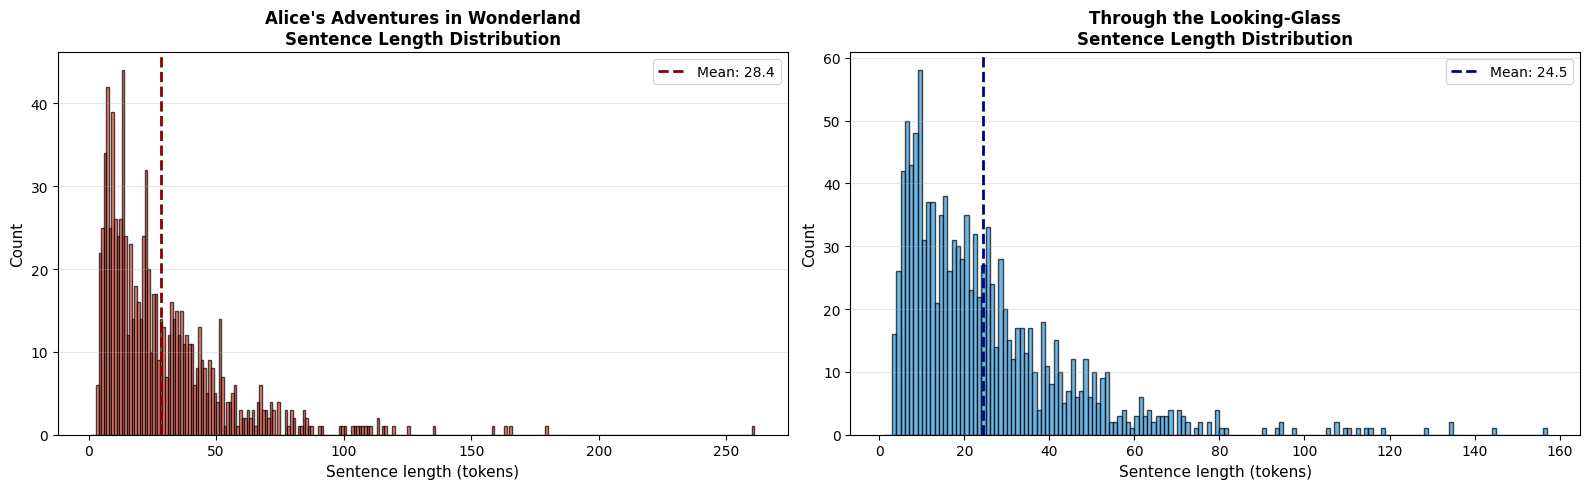

In [3]:
# Visualize sentence length distributions for both books
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Wonderland
ax1 = axes[0]
ax1.hist(wonderland_tokens, bins=range(1, max(wonderland_tokens)+2), alpha=0.7, color='#e74c3c', edgecolor='black')
ax1.set_xlabel('Sentence length (tokens)', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.set_title("Alice's Adventures in Wonderland\nSentence Length Distribution", fontsize=12, fontweight='bold')
ax1.axvline(sum(wonderland_tokens)/len(wonderland_tokens), color='darkred', linestyle='--', linewidth=2, label=f'Mean: {sum(wonderland_tokens)/len(wonderland_tokens):.1f}')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Looking-Glass
ax2 = axes[1]
ax2.hist(looking_glass_tokens, bins=range(1, max(looking_glass_tokens)+2), alpha=0.7, color='#3498db', edgecolor='black')
ax2.set_xlabel('Sentence length (tokens)', fontsize=11)
ax2.set_ylabel('Count', fontsize=11)
ax2.set_title('Through the Looking-Glass\nSentence Length Distribution', fontsize=12, fontweight='bold')
ax2.axvline(sum(looking_glass_tokens)/len(looking_glass_tokens), color='darkblue', linestyle='--', linewidth=2, label=f'Mean: {sum(looking_glass_tokens)/len(looking_glass_tokens):.1f}')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

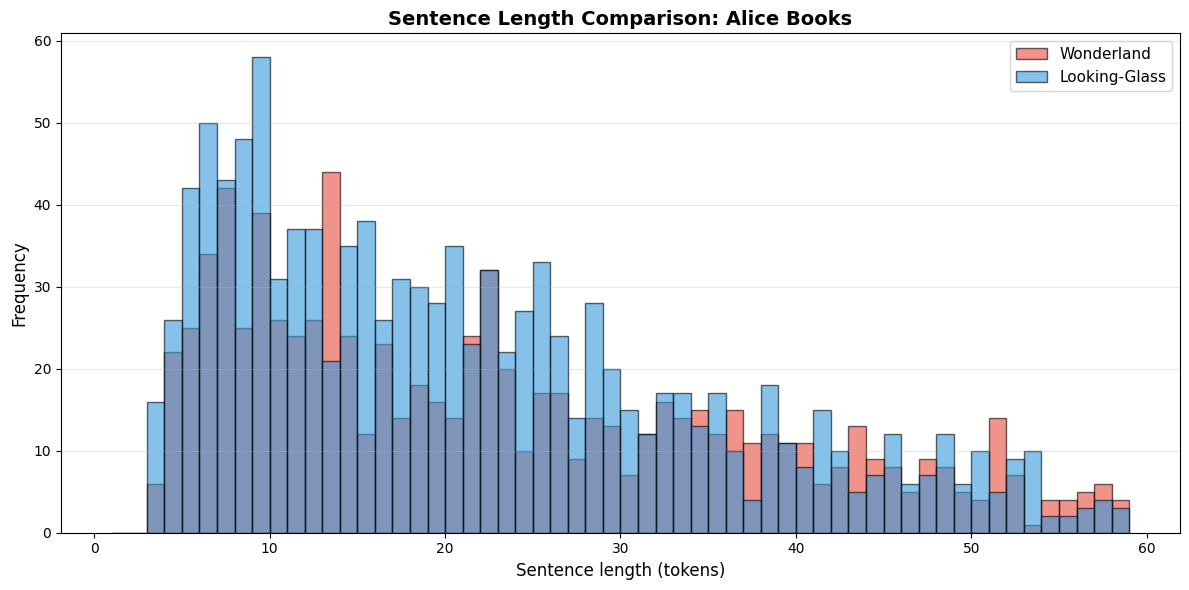


COMPARATIVE STATISTICS
Metric                              Wonderland   Looking-Glass
----------------------------------------------------------------------
Mean sentence length                     28.41           24.49
Median sentence length                      22              20
Shortest sentence                            3               3
Longest sentence                           260             156


In [4]:
# Compare both books side by side
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(wonderland_tokens, bins=range(1, 60), alpha=0.6, color='#e74c3c', label='Wonderland', edgecolor='black')
ax.hist(looking_glass_tokens, bins=range(1, 60), alpha=0.6, color='#3498db', label='Looking-Glass', edgecolor='black')
ax.set_xlabel('Sentence length (tokens)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Sentence Length Comparison: Alice Books', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*70)
print("COMPARATIVE STATISTICS")
print("="*70)
print(f"{'Metric':<30} {'Wonderland':>15} {'Looking-Glass':>15}")
print("-"*70)
print(f"{'Mean sentence length':<30} {sum(wonderland_tokens)/len(wonderland_tokens):>15.2f} {sum(looking_glass_tokens)/len(looking_glass_tokens):>15.2f}")
print(f"{'Median sentence length':<30} {sorted(wonderland_tokens)[len(wonderland_tokens)//2]:>15} {sorted(looking_glass_tokens)[len(looking_glass_tokens)//2]:>15}")
print(f"{'Shortest sentence':<30} {min(wonderland_tokens):>15} {min(looking_glass_tokens):>15}")
print(f"{'Longest sentence':<30} {max(wonderland_tokens):>15} {max(looking_glass_tokens):>15}")